# Подгрузка

In [643]:
import pickle
import os

path_to_directory = '/Users/fulyankin/Documents/massResearch_houses/data'
files =  os.listdir(path_to_directory)

files = [item for item in files if '.pickle' in item]
files

['info_0_10000.pickle',
 'info_10001_10096.pickle',
 'info_10096_11657.pickle',
 'info_11657_11900.pickle',
 'info_11900_11959.pickle',
 'info_11959_12645.pickle',
 'info_12646_12796.pickle',
 'info_12797_13564.pickle',
 'info_13565_14017.pickle',
 'info_14018_15071.pickle',
 'info_15072_17924.pickle',
 'info_17925_18898.pickle',
 'info_18899_19416.pickle',
 'info_19417_19755.pickle',
 'info_19756_21105.pickle',
 'info_25000_25664.pickle',
 'info_25664_26397.pickle',
 'info_26397_26496.pickle',
 'info_26496_26556.pickle',
 'info_26556_26624.pickle',
 'info_26624_26768.pickle',
 'info_26768_26836.pickle',
 'info_26836_26916.pickle',
 'info_26917_26961.pickle',
 'info_26961_27020.pickle',
 'info_27020_27183.pickle',
 'info_27183_27714.pickle',
 'info_60000_70000.pickle',
 'info_70000.pickle']

In [644]:
data_real = [ ]

for file in files:
    with open('data/' + file, 'rb') as f:
        data_new = pickle.load(f)
        data_real.extend(data_new)

# Предобработка данных

In [645]:
import pandas as pd
df = pd.DataFrame(data_real)

df = df.drop_duplicates(subset=['href'])
df.shape

(25621, 37)

In [646]:
df.head(2) #.tail()

,Тип жилья,Площадь комнат,Санузел,Балкон/лоджия,Ремонт,Вид из окон,Год постройки,Тип дома,Тип перекрытий,Подъезды,...,комментарий,href,Высота потолков,Планировка,Газоснабжение,Строительная серия,Отделка,Срок сдачи,Комнат в продажу,Размер доли
0,Вторичка,21-14-11 м²,1 раздельный,1 лоджия,Евроремонт,Во двор,2002,Монолитный,Железобетонные,5,...,None,https://www.cian.ru/sale/flat/200597045/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Вторичка,NaN,2 совмещенных,1 балкон,Без ремонта,NaN,2017,Монолитный,Железобетонные,2,...,None,https://www.cian.ru/sale/flat/226507726/,"2,64 м",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25621 entries, 0 to 39771
Data columns (total 37 columns):
Тип жилья             25621 non-null object
Площадь комнат        16766 non-null object
Санузел               22582 non-null object
Балкон/лоджия         15279 non-null object
Ремонт                18366 non-null object
Вид из окон           18358 non-null object
Год постройки         17848 non-null object
Тип дома              19035 non-null object
Тип перекрытий        16223 non-null object
Подъезды              17209 non-null object
Лифты                 24945 non-null object
Отопление             16496 non-null object
Аварийность           18029 non-null object
Парковка              12088 non-null object
Мусоропровод          11489 non-null object
цена                  25621 non-null int64
описание              25621 non-null object
Общая                 25621 non-null object
Жилая                 20949 non-null object
Кухня                 20664 non-null object
Этаж        

In [648]:
df.shape

(25621, 37)

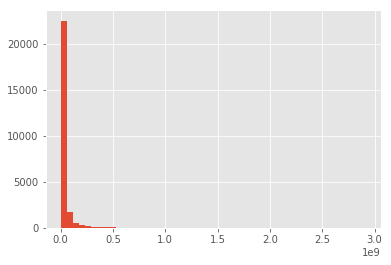

In [649]:
df['цена'].hist(bins=50);

In [650]:
df[df['цена'] > 2e+9]

,Тип жилья,Площадь комнат,Санузел,Балкон/лоджия,Ремонт,Вид из окон,Год постройки,Тип дома,Тип перекрытий,Подъезды,...,комментарий,href,Высота потолков,Планировка,Газоснабжение,Строительная серия,Отделка,Срок сдачи,Комнат в продажу,Размер доли
718,Вторичка Пентхаус,NaN,NaN,"4 балкона, 1 лоджия",Без ремонта,На улицу и двор,2009,Кирпичный,Смешанные,2,...,None,https://www.cian.ru/sale/flat/174282187/,NaN,Смежно-изолированная,NaN,С-222,NaN,NaN,NaN,NaN
11134,Вторичка,NaN,4 совмещенных,1 лоджия,Без ремонта,На улицу и двор,2009,Кирпичный,Смешанные,2,...,None,https://www.cian.ru/sale/flat/223990120/,3 м,NaN,NaN,С-222,NaN,NaN,NaN,NaN
30070,Вторичка,NaN,"4 совмещенных, 4 раздельных","1 балкон, 1 лоджия",Без ремонта,На улицу и двор,2009,Кирпичный,Смешанные,2,...,None,https://www.cian.ru/sale/flat/197214440/,NaN,NaN,NaN,С-222,NaN,NaN,NaN,NaN
33912,Вторичка,NaN,4 раздельных,"1 балкон, 1 лоджия",NaN,NaN,2009,Кирпичный,Смешанные,2,...,None,https://www.cian.ru/sale/flat/190718702/,NaN,NaN,NaN,С-222,NaN,NaN,NaN,NaN
37220,Вторичка,NaN,NaN,NaN,Без ремонта,NaN,2009,Монолитный,NaN,1,...,None,https://www.cian.ru/sale/flat/211088596/,NaN,Смежно-изолированная,NaN,NaN,NaN,NaN,NaN,NaN


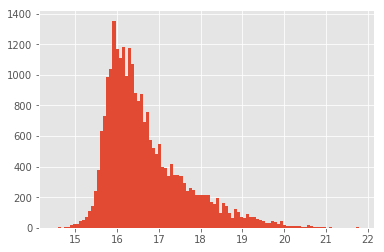

In [651]:
import numpy as np
df['цена'].apply(lambda w: np.log(w)).hist(bins=100);

# Предобработка данных

In [652]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [653]:
import pandas as pd
df = pd.DataFrame(data_real)

df = df.drop_duplicates(subset=['href'])
df.reset_index(drop=True, inplace=True)

df.shape

(25621, 37)

In [654]:
dff = pd.DataFrame()  # тут хорошие данные

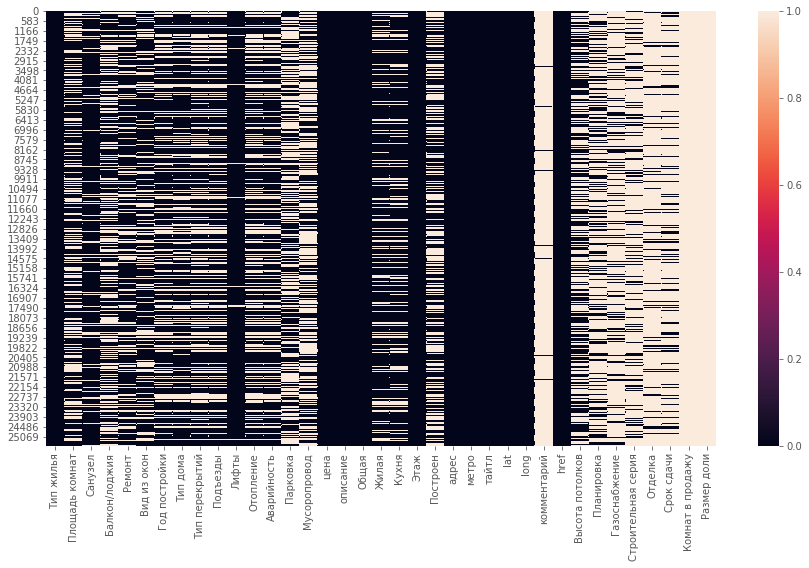

In [655]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull());

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


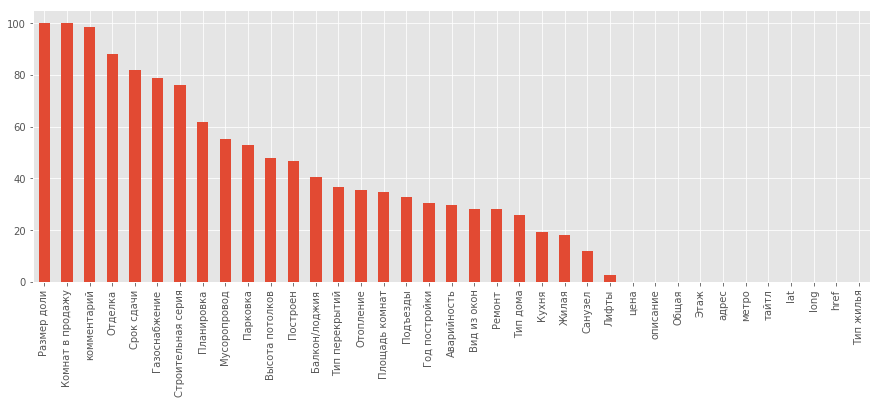

In [656]:
plt.figure(figsize=(15,5))
(100*df.isnull().sum()/df.shape[0]).sort_values(ascending=False).plot('bar');

Выкидываем неинформативные признаки

In [657]:
df.drop(['Аварийность', 'Комнат в продажу', 'Размер доли'], axis=1, inplace=True)

# пока что выкинем их из рассмотрения, потом если чё вренём
df.drop('Строительная серия', axis=1, inplace=True)

1. Переменная попадает ли дом на реиновацию

In [658]:
df['комментарий'].unique()

array([None,
       'Дом под сносПо результатам голосования жильцов дом включен в программу реновации и будет снесен'],
      dtype=object)

In [659]:
dff['is_reinovation'] = (1 - df['комментарий'].isnull())

2. Категориальные переменные

In [660]:
tradeoff = 0.02*df.shape[0]

In [661]:
import re

def f_create(reg):
    def f(w):
        if w is np.nan:
            return np.nan
        else:
            x = re.findall(reg, w)
            if len(x) == 0:
                return None
            else:
                return str(x[0]) 
    return f

# пример работы фабрики функций
f = f_create('(\d) л')
f('1 балкон, 1 лоджия')

'1'

In [662]:
df['балконы'] = df['Балкон/лоджия'].apply(f_create('(\d) б'))
df['лоджии'] = df['Балкон/лоджия'].apply(f_create('(\d) л'))

df['санузлы_раздельные'] = df['Санузел'].apply(f_create('(\d) р'))
df['санузлы_совместные'] = df['Санузел'].apply(f_create('(\d) с'))

df['лифты_пас'] = df['Лифты'].apply(f_create('(\d) п'))
df['лифты_гр'] = df['Лифты'].apply(f_create('(\d) г'))

# df[['Балкон/лоджия', 'балконы','лоджии']].sample(10)
df.drop(['Балкон/лоджия', 'Санузел', 'Лифты'], axis=1, inplace=True)

In [663]:
df['комнаты'] = df['тайтл'].apply(lambda w: w.split(' ')[0]).value_counts()

Теперь считаем частоты!        

In [664]:
def freq_less_trade(x):
    freq = df[x].value_counts()
    bad_value = freq[freq < tradeoff].index
    df[x] = df[x].apply(lambda w: 'другое' if w in bad_value else w)

for x in var_cat:
    freq_less_trade(x)

In [665]:
df['лифты_пас'].value_counts()

1         16198
2          3400
другое      762
Name: лифты_пас, dtype: int64

3. Непрерывные переменные

In [666]:
def ceil(w):
    if w is np.nan:
        return np.nan
    else:
        y = float(re.sub('[, ]', '.', w)[:-2])
        if y > 10 and y < 100:
            return y / 10
        elif y >= 100:
            return y/100
        elif y < 2:
            return np.nan
        else:
            return y
    
dff['Высота потолков'] = df['Высота потолков'].apply(ceil)

In [667]:
dff['Подъезды'] = df['Подъезды'].apply(lambda w: w if w is np.nan else int(w))
dff.loc[dff['Подъезды'] > 30, 'Подъезды'] = np.nan

In [668]:
def sq(w):
    if w is np.nan:
        return np.nan
    else:
        y = re.sub(',', '.', w)[:-2]
        y = re.sub(' ', '', y)
        return float(y)
    
dff['Жилая'] = df['Жилая'].apply(sq)
dff['Кухня'] = df['Кухня'].apply(sq)
dff['Общая'] = df['Общая'].apply(sq)

In [669]:
# Дз: фабрика функций, mean max median, len 
 
# def sq_rooms():
#     def f(w):
#         if w is np.nan:
#             return np.nan
#         else:
#             y = re.sub(',', '.', w)[:-2]
#             y = re.sub('[ \(\)]', '', y)
#             y = [float(item) for item in re.split('[-+/]', y)]
#             return np.mean(y)
#     return f

# f = sq_rooms()
# df['Площадь комнат'].apply(f)

In [670]:
dff['Этаж'] = df['Этаж'].apply(lambda w: int(w.split(' из ')[0]))
dff['Этажность'] = df['Этаж'].apply(lambda w: int(w.split(' из ')[1]))
dff['первый_этаж'] = df['Этаж'].apply(lambda w: 1*(w.split(' из ')[0] == '1'))
dff['последний_этаж'] = df['Этаж'].apply(lambda w: 1*(w.split(' из ')[0] == w.split(' из ')[1]))

In [671]:
# Дз: распарсить переменную со станциями и временем (пешком/на машине) на мног переменных 
#
# - минимально пешком/на машине
# - максимално 
# - количество станций метро рядом
# - название ближайшей станции если пешком 
# - название ближайшей станции если на машине 
# (если две с одинаковым берем любую) 

In [672]:
df['метро'].iloc[0]

['Октябрьское поле ⋅  9 мин. пешком',
 'Зорге ⋅  9 мин. пешком',
 'Панфиловская ⋅  16 мин. пешком']

4. Время 

In [673]:
dff['возраст'] = df['Год постройки'].apply(lambda w: w if w is np.nan else int(w))
dff.loc[dff['возраст'] < 1900, 'возраст'] = np.nan
dff['возраст'] =  2020 - dff['возраст']

In [674]:
df['год сдачи'] = df['Срок сдачи'].apply(lambda w: w if w is np.nan else w.split(' ')[-1])
df['квартал'] = df['Срок сдачи'].apply(lambda w: w if w is np.nan else int(w.split(' ')[0]))

df.loc[df['год сдачи'] < '2020', 'квартал'] = np.nan
df.loc[df['год сдачи'] < '2020', 'год сдачи'] = np.nan
df.loc[df['квартал'] >= 5, 'квартал'] = 1

df['квартал'].replace({1:'01', 2: '04', 3: '07', 4: '10'}, inplace=True)
df['срок сдачи'] = df['год сдачи'].astype(str) + '-' + df['квартал']

In [675]:
df['срок сдачи'].dropna()

17       2021-10
23       2021-07
31       2022-04
37       2020-10
40       2022-04
          ...   
25583    2021-04
25599    2021-04
25603    2021-07
25607    2021-10
25611    2022-04
Name: срок сдачи, Length: 3614, dtype: object

In [676]:
from datetime import datetime  # пакет для работы с датами

In [677]:
x = '2021-04'
y = datetime.strptime(x, "%Y-%m")
y

datetime.datetime(2021, 4, 1, 0, 0)

In [678]:
y1 = datetime.strptime('2020-01', "%Y-%m")
(y - y1).days // 30

15

In [679]:
def get_time_delta(x):
    if x is np.nan:
        return x
    else:
        y = datetime.strptime(x, "%Y-%m")
        y1 = datetime.strptime('2020-01', "%Y-%m")
        return (y - y1).days // 30
    
dff['срок сдачи'] = df['срок сдачи'].apply(get_time_delta)

# Финалочка 

In [ ]:
var_cat = ['Отделка', 'Газоснабжение',
'Планировка', 'Мусоропровод', 'Парковка',
'Тип перекрытий', 'Отопление', 'Вид из окон',
'Ремонт', 'Тип дома', 'Тип жилья',

'балконы', 'лоджии',   'санузлы_раздельные',
'санузлы_совместные', 'лифты_пас', 'лифты_гр',
          
'комнаты'] 

In [681]:
dff[var_cat] = df[var_cat]
dff.head()

,is_reinovation,Высота потолков,Подъезды,Жилая,Кухня,Общая,Этаж,Этажность,первый_этаж,последний_этаж,...,Ремонт,Тип дома,Тип жилья,балконы,лоджии,санузлы_раздельные,санузлы_совместные,лифты_пас,лифты_гр,комнаты
0,0,NaN,5.0,46.0,13.0,82.0,11,19,0,0,...,Евроремонт,Монолитный,Вторичка,None,1,1,None,2,1,NaN
1,0,2.64,2.0,NaN,NaN,103.3,20,39,0,0,...,Без ремонта,Монолитный,Вторичка,1,None,None,2,None,None,NaN
2,0,3.40,24.0,113.0,15.0,167.0,10,12,0,0,...,Дизайнерский,Кирпичный,Вторичка,1,1,1,None,1,None,NaN
3,0,2.70,6.0,50.6,7.7,76.4,5,5,0,1,...,Евроремонт,Кирпичный,Вторичка,1,None,None,1,None,None,NaN
4,0,NaN,NaN,41.0,25.0,119.0,4,6,0,0,...,Дизайнерский,Монолитный,Вторичка Апартаменты,1,None,2,None,1,None,NaN


In [689]:
var_cat = var_cat + ['is_reinovation', 'первый_этаж', 'последний_этаж']
var_real = list(set(dff.columns) - set(var_cat))

var_teh = ['адрес', 'описание', 'href', 'lat', 'long']
target = 'цена'

In [690]:
dff[var_teh] = df[var_teh]
dff[target] =  df[target]

In [693]:
dff.dtypes

is_reinovation          int64
Высота потолков       float64
Подъезды              float64
Жилая                 float64
Кухня                 float64
Общая                 float64
Этаж                    int64
Этажность               int64
первый_этаж             int64
последний_этаж          int64
возраст               float64
срок сдачи            float64
Отделка                object
Газоснабжение          object
Планировка             object
Мусоропровод           object
Парковка               object
Тип перекрытий         object
Отопление              object
Вид из окон            object
Ремонт                 object
Тип дома               object
Тип жилья              object
балконы                object
лоджии                 object
санузлы_раздельные     object
санузлы_совместные     object
лифты_пас              object
лифты_гр               object
комнаты               float64
цена                    int64
dtype: object

In [694]:
dff = pd.get_dummies(dff)#, dummy_na=True, drop_first=True)
dff.head()

,is_reinovation,Высота потолков,Подъезды,Жилая,Кухня,Общая,Этаж,Этажность,первый_этаж,последний_этаж,...,санузлы_совместные_1,санузлы_совместные_2,санузлы_совместные_3,санузлы_совместные_другое,лифты_пас_1,лифты_пас_2,лифты_пас_другое,лифты_гр_1,лифты_гр_2,лифты_гр_другое
0,0,NaN,5.0,46.0,13.0,82.0,11,19,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,2.64,2.0,NaN,NaN,103.3,20,39,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,3.40,24.0,113.0,15.0,167.0,10,12,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,2.70,6.0,50.6,7.7,76.4,5,5,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,NaN,NaN,41.0,25.0,119.0,4,6,0,0,...,0,0,0,0,1,0,0,0,0,0


Гистограмки

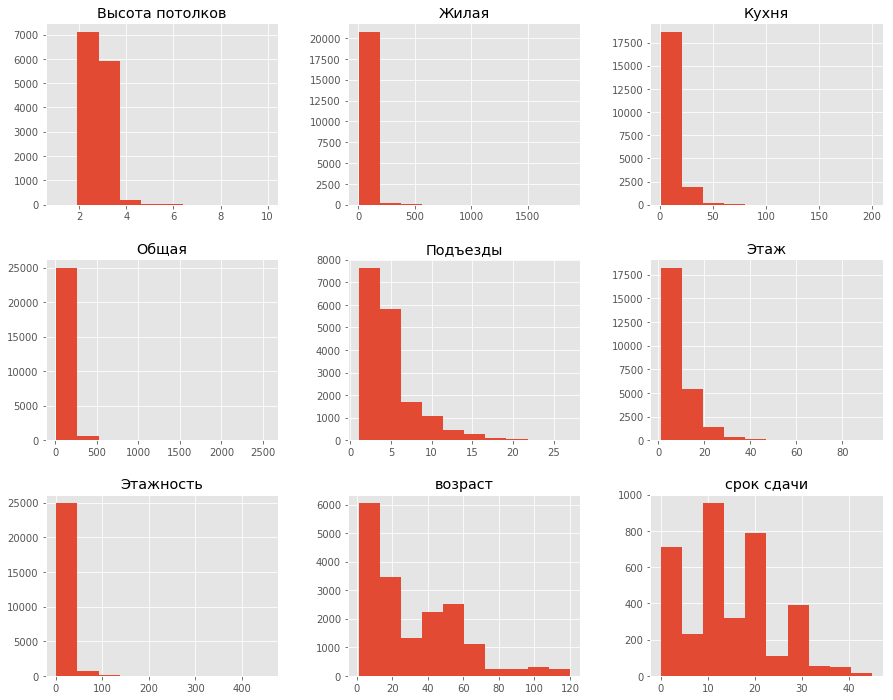

In [686]:
dff[var_real + [target]].hist(figsize=(15,12));

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1080x864 with 0 Axes>

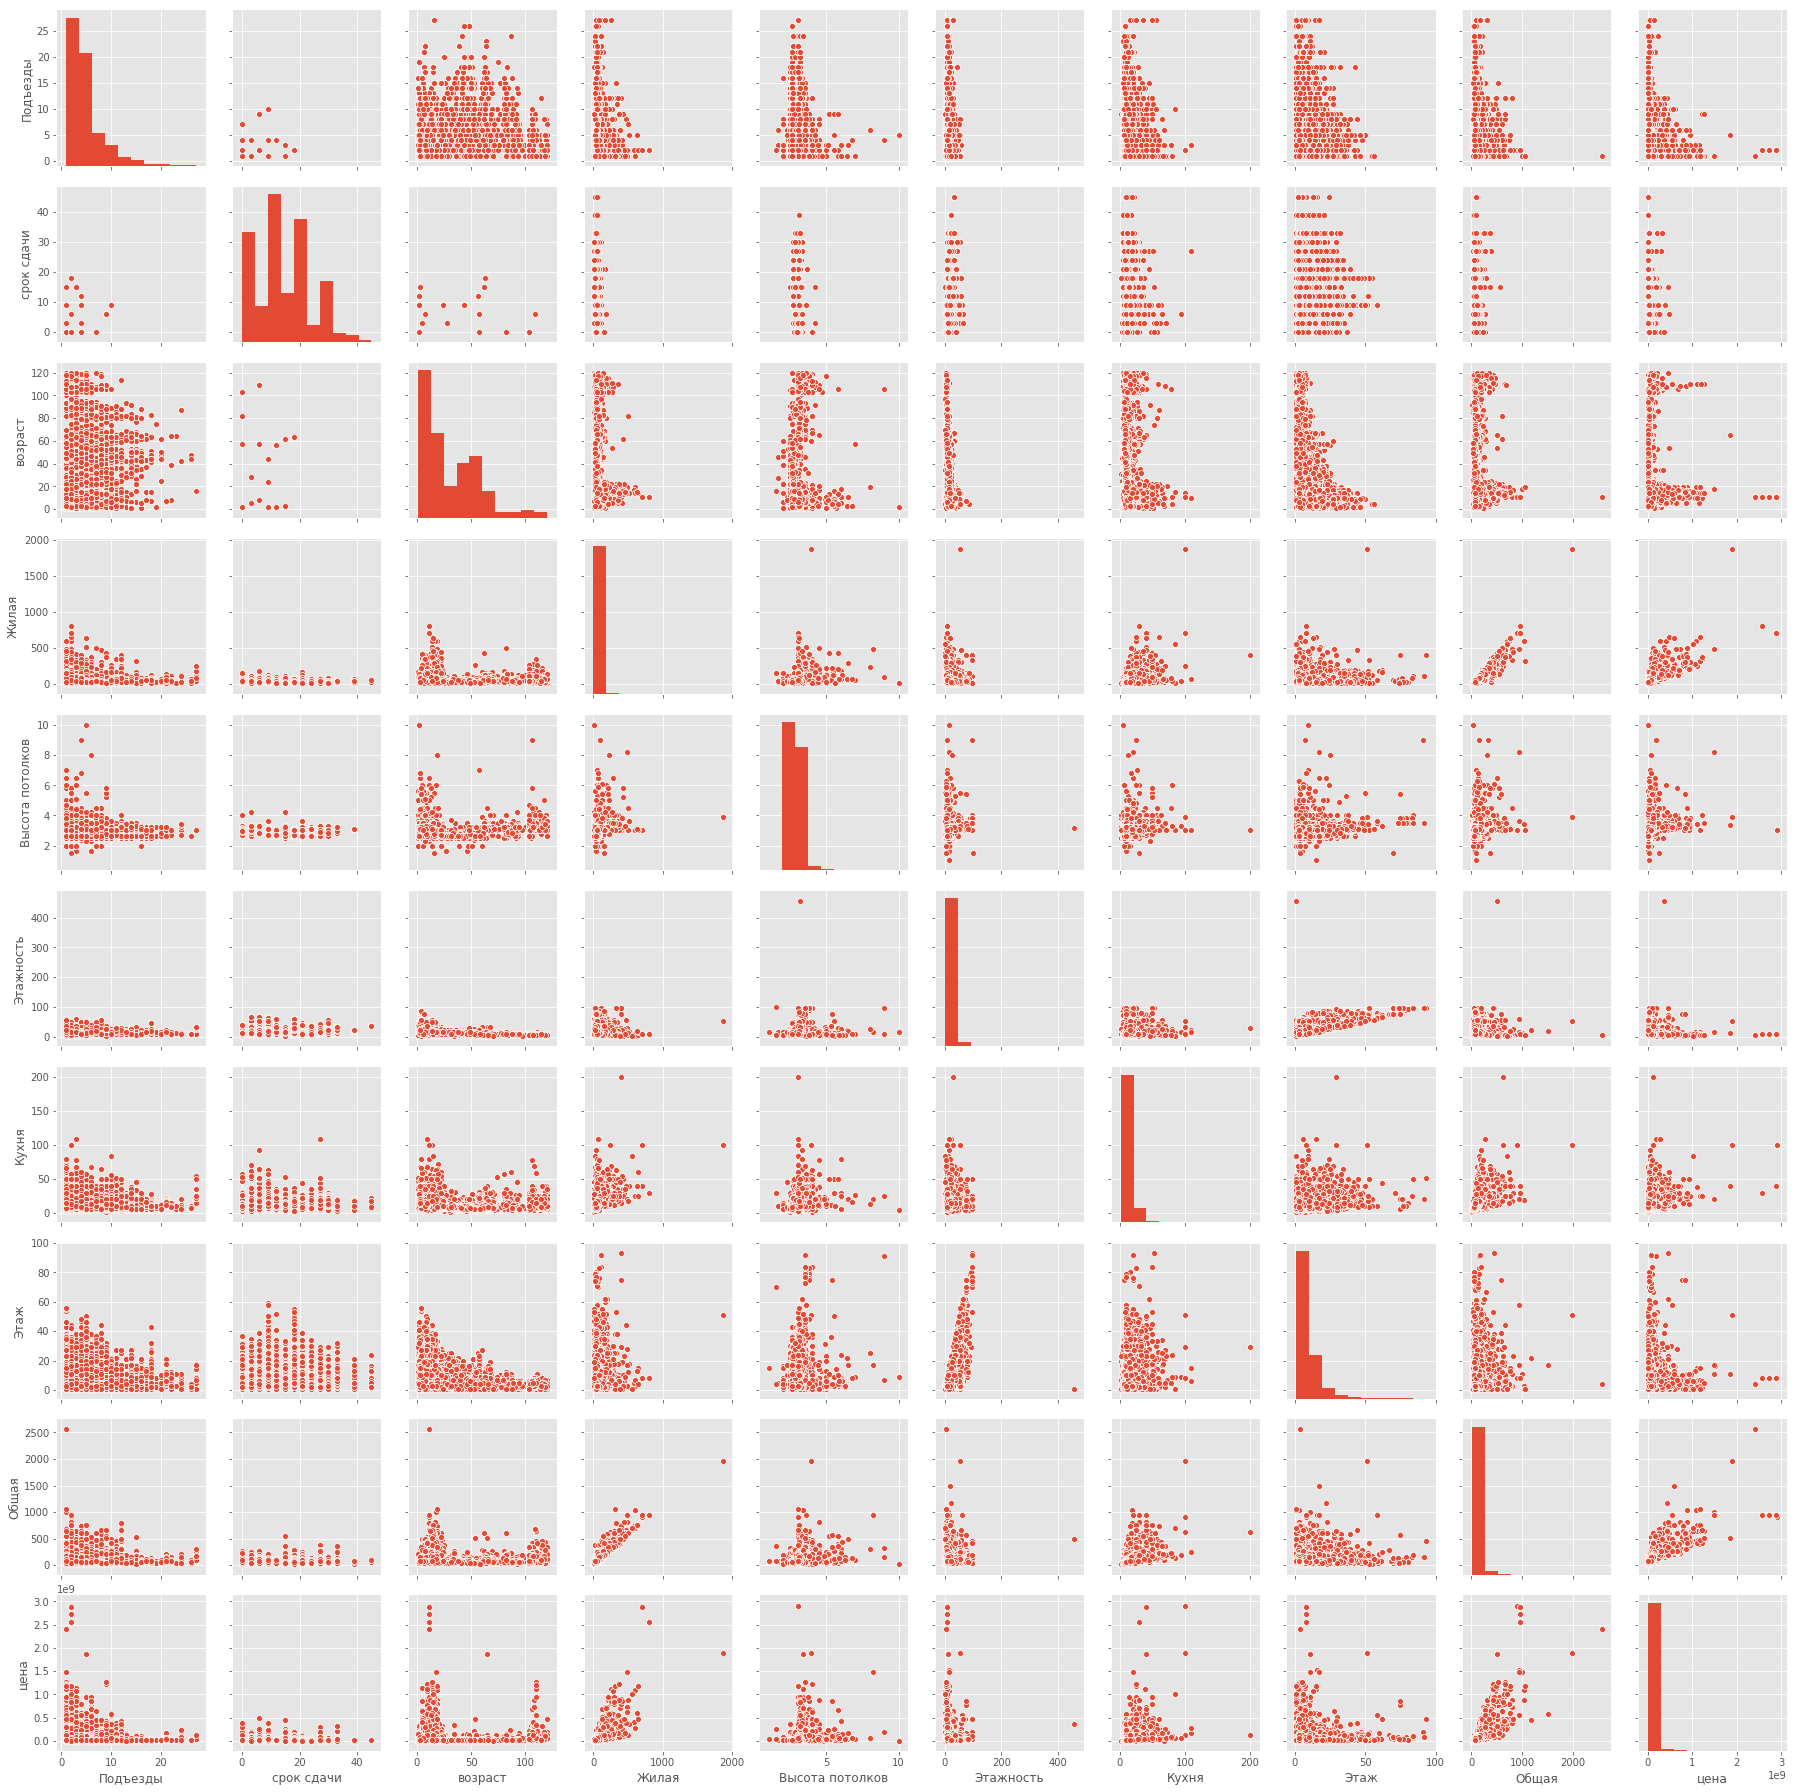

In [692]:
plt.figure(figsize=(15,12))
sns.pairplot(dff[var_real + [target]])